In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import os
import re
root_path = 'log/'

legend_font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 12,
    }
font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,
    }

def smooth(r_list,smooth_len):
    plot_list = []
    for i in range(len(r_list)-smooth_len):
        plot_list.append(np.mean(r_list[i:(i+smooth_len)]))
    for i in range(smooth_len):
        plot_list.append(r_list[len(r_list)-smooth_len+i])
    return plot_list

#### Basic case

In [858]:
# choice models
import json
GT_folder = 'rl'+ 'N=10' + 'M=4' + 'k=0.03' + 'L=100' + 'T=500'
with open('GT/'+GT_folder+'/seqdata.json', 'r') as f:
    seqdata = json.loads(f.read())
with open('GT/'+GT_folder+'/transdata.json', 'r') as f:
    transdata = json.loads(f.read())
train_sequences = list(seqdata.values())[:int(0.8*500)]
seg_prob = np.zeros(4+1)
for l in train_sequences:
    seg_prob[-1] += len(l)
    for m in range(4):
        seg_prob[m] += l.count(m)
seg_prob = (seg_prob/seg_prob[-1])[:-1]
print(seg_prob)
print("in sample:")
mnl_in_sample = [-0.743, -1.335, -1.600, -1.675]
lcmnl_in_sample = [-0.738, -1.317, -1.600, -1.674]
rcs_in_sample = [-0.750, -1.335, -1.578, -1.635]
mc_in_sample = [-0.623, -1.176, -1.459, -1.541]
assort_net_in_sample = [-0.631, -1.194, -1.486, -1.552]
average = [0,0,0,0,0]
for i in range(5):
    model = [mnl_in_sample,lcmnl_in_sample, rcs_in_sample,mc_in_sample,assort_net_in_sample][i]
    for m in range(4):
        average[i] += seg_prob[m]*model[m]
print(average)
print("out of sample:")
mnl_testing = [-0.722, -1.318, -1.594, -1.688]
lcmnl_testing = [-0.718, -1.302, -1.595, -1.685]
rcs_testing = [-0.725, -1.323, -1.572, -1.656]
mc_testing = [-0.601, -1.159, -1.471, -1.573]
assort_net_testing = [-0.612, -1.182, -1.505, -1.580]
average = [0,0,0,0,0]
for i in range(5):
    model = [mnl_testing,lcmnl_testing, rcs_testing,mc_testing,assort_net_testing][i]
    for m in range(4):
        average[i] += seg_prob[m]*model[m]
print(average)

[0.24368734 0.25446597 0.25748097 0.24436572]
in sample:
[-1.3420538931182633, -1.3360107032486621, -1.3283204944599383, -1.2033014999623124, -1.2194713951910756]
out of sample:
[-1.3342424059696993, -1.3287205849099268, -1.3227615135298108, -1.2045239315595084, -1.2235221225597348]


##### Figure 6

/tmp/ipykernel_136323/2309318777.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


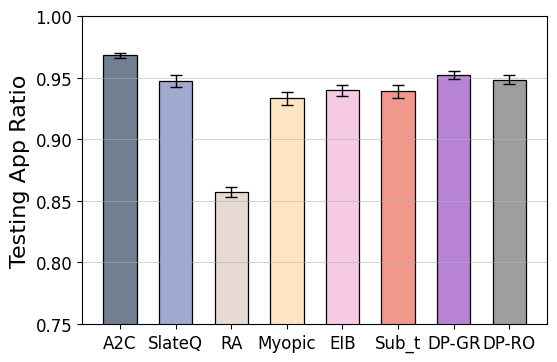

In [24]:
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV10C4'
benchmark_file = case_file+'Benchmark_INV10'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_10 = []
    test_opt_10 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_10.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_10.append(float(line.split(':')[-1]))
train_opt_10 = np.mean(train_opt_10)
test_opt_10 = np.mean(test_opt_10)

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_10)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_10)
            EIB_list.append(float(line.split(',')[-4])/test_opt_10)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_10)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_10)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_10)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_10)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=500INV=10DQNmc/' + 'DRLTrainLog2024-11-26-20-46-16', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_10)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.75,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I10L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


/tmp/ipykernel_136323/143867351.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


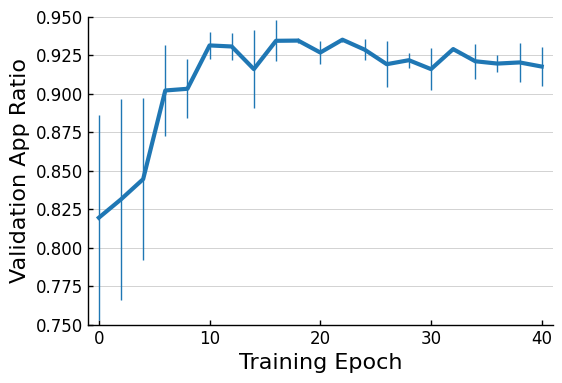

In [25]:
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV10C4'

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_ = []
    result_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
        if 'completed' in line:
            list_.append(result_list[:41])
            result_list = []
list_ = np.array(list_[:-1]) 
y = list_.mean(0)
err = list_.std(0)
steps = np.arange(41)
x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)
ax.errorbar(steps[::2], y[::2], yerr=err[::2],errorevery=1,elinewidth=1
             ,linewidth=3)

# Set labels and title
ax.set_xlabel("Training Epoch", fontsize=16)
ax.set_ylabel('Validation App Ratio', fontsize=16)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)  # Set bottom spine linewidth
ax.spines['left'].set_linewidth(1)    # Set left spine linewidth

# Tick parameters
ax.tick_params(direction='in', width=1)
ax.set_xlim(-1, 41)
ax.set_ylim(0.75, 0.95)
ax.set_xticks(steps[::10])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
#plt.legend(prop = {'size':12})
plt.savefig(r'plot/'+'rlN10M4k003I10L100T500mc_train'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show()

##### Figure 5

/tmp/ipykernel_136323/302061262.py:36: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


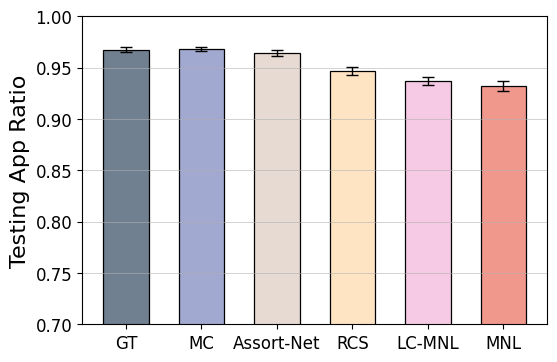

In [33]:
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream_simulator_list = []
simulator_list = ['GT','mc','net','rcs','lcmnl','mnl']
for simulator in simulator_list:
    train_stream_simulator_list.append('rlN=10M=4k=0.03L=100T=500INV=10RNN'+simulator+'/')
stream_list = ['DRLTrainLog2024-12-23-14-42-35','DRLTrainLog2024-12-13-10-40-21',
              'DRLTrainLog2024-12-14-16-42-00','DRLTrainLog2024-12-14-16-42-12',
              'DRLTrainLog2024-12-14-16-42-19','DRLTrainLog2024-12-14-16-42-27']

for i in range(len(train_stream_simulator_list)):
    train_stream_simulator_list[i] += stream_list[i]
y = []
std_err = []
for stream in train_stream_simulator_list:
    with open(r'log/' + stream, 'r') as f:
        data = f.readlines()
        seller_list = []
        for line in data:
            if 'mean test reward:' in line:
                seller_list.append(float(line.split(',')[-7][-8:])/test_opt_10)
    y.append(np.mean(seller_list))
    std_err.append(np.array(seller_list).std())
            
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

simulator_list = ['GT','MC','Assort-Net','RCS','LC-MNL','MNL']
ax.bar([1,2,3,4,5,6],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=simulator_list)
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I10L100T500compare'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


In [742]:
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream_simulator_list = []
simulator_list = ['GT','mc']
for simulator in simulator_list:
    train_stream_simulator_list.append('rlN=10M=4k=0.03L=100T=500INV=10RNN'+simulator+'/')
stream_list = ['DRLTrainLog2024-12-23-14-42-35','DRLTrainLog2024-12-13-10-40-21']

for i in range(len(train_stream_simulator_list)):
    train_stream_simulator_list[i] += stream_list[i]

stream = train_stream_simulator_list[0]
with open(r'log/' + stream, 'r') as f:
    data = f.readlines()
    seller_list1 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list1.append(float(line.split(',')[-7][-8:]))

stream = train_stream_simulator_list[1]
with open(r'log/' + stream, 'r') as f:
    data = f.readlines()
    seller_list2 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list2.append(float(line.split(',')[-7][-8:]))

f_stat, p_value = stats.f_oneway(seller_list1, seller_list2)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("At least one group is significantly different.")
else:
    print("No significant differences among the groups.")

F-statistic: 0.44825863719432296
P-value: 0.5116606186339985
No significant differences among the groups.


##### Figure EC.18

[0.9454451369234409, 0.9680880226934638, 0.961106356293908]


/tmp/ipykernel_136323/1537553387.py:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


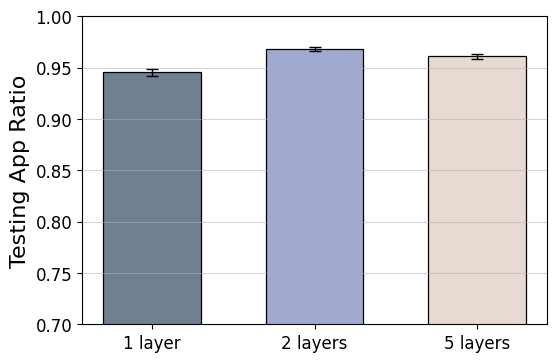

In [26]:
#layers
# 1 layer

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-12-23-17-01'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list1 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list1.append(float(line.split(',')[-7][-8:])/test_opt_10)
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list2 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list2.append(float(line.split(',')[-7][-8:])/test_opt_10)
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-15-12-00-04'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list5 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list5.append(float(line.split(',')[-7][-8:])/test_opt_10)
            
y = [np.mean(seller_list1),np.mean(seller_list2),np.mean(seller_list5)]
print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list1).std(),np.array(seller_list2).std(),np.array(seller_list5).std()]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['1 layer','2 layers','5 layers'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(12,19,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'003I10layers'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


##### Figure EC.1

/tmp/ipykernel_136323/422528430.py:112: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


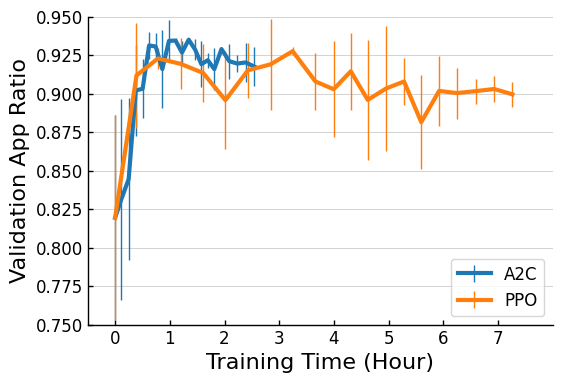

In [28]:
#PPO
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV10C4'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'

with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_ = []
    list_time = []
    result_list = []
    time_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
            time_list.append(re.split(' |\n', line)[1][:-4])
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
            time_list.append(re.split(' |\n', line)[1][:-4])
        if 'completed' in line:
            list_.append(result_list[:41])
            list_time.append(time_list[:41])
            result_list = []
            time_list = []
list_ = np.array(list_[:-1]) 
y = list_.mean(0)
err = list_.std(0)

# Sample list of time strings
steps = list_time[-3]
from datetime import datetime
# Convert time strings to datetime objects
time_objects = [datetime.strptime(t, '%H:%M:%S') for t in steps]
# Calculate time differences
time_differences = [0]  # The first element is 0
for i in range(1, len(time_objects)):
    time_diff = (time_objects[i] - time_objects[0]).total_seconds() / 3600.0
    time_differences.append(time_diff)

x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)
ax.errorbar(time_differences[::2], y[::2], yerr=err[::2],errorevery=1,elinewidth=1
             ,linewidth=3,label='A2C')


train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10PPOmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-02-16-55-54'

with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_ = []
    list_time = []
    result_list = []
    time_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
            time_list.append(re.split(' |\n', line)[1][:-4])
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
            time_list.append(re.split(' |\n', line)[1][:-4])
        if 'completed' in line:
            list_.append(result_list[:41])
            list_time.append(time_list[:41])
            result_list = []
            time_list = []
list_ = np.array(list_[:-1]) 
y = list_.mean(0)
err = list_.std(0)

# Sample list of time strings
steps = list_time[-3]
from datetime import datetime
# Convert time strings to datetime objects
time_objects = [datetime.strptime(t, '%H:%M:%S') for t in steps]
# Calculate time differences
time_differences = [0]  # The first element is 0
for i in range(1, len(time_objects)):
    time_diff = (time_objects[i] - time_objects[0]).total_seconds() / 3600.0
    time_differences.append(time_diff)
    
x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)
ax.errorbar(time_differences[::2], y[::2], yerr=err[::2],errorevery=1,elinewidth=1
             ,linewidth=3,label='PPO')

# Set labels and title
ax.set_xlabel("Training Time (Hour)", fontsize=16)
ax.set_ylabel('Validation App Ratio', fontsize=16)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)  # Set bottom spine linewidth
ax.spines['left'].set_linewidth(1)    # Set left spine linewidth

# Tick parameters
ax.tick_params(direction='in', width=1)
ax.set_xlim(-0.5, 8)
ax.set_ylim(0.75, 0.95)
ax.set_xticks(np.arange(8))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.legend(fontsize=12,loc='lower right')
plt.savefig(r'plot/'+'003I10PPO_train'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show()

[0.9680880226934638, 0.9626926897383565]
[0.002086214237944098, 0.0019125601498692377]


/tmp/ipykernel_136323/2430832728.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


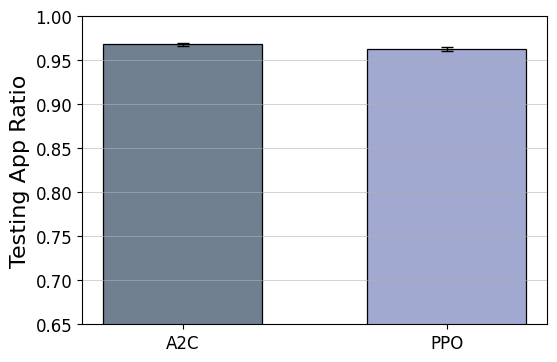

In [52]:
#PPO
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list2 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list2.append(float(line.split(',')[-7][-8:])/test_opt_10)
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10PPOmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-02-16-55-54'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list5 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list5.append(float(line.split(',')[-7][-8:])/test_opt_10)
            
y = [np.mean(seller_list2),np.mean(seller_list5)]
print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list2).std(),np.array(seller_list5).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','PPO'])
ax.set_ylim(0.65,1)
#ax.set_yticks(range(12,19,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'003I10PPO'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


##### Figure EC.14

/tmp/ipykernel_136323/1188282874.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='y', linewidth=0.4)
/tmp/ipykernel_136323/1188282874.py:113: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax_inset.grid(b=True, which='major', axis='y', linewidth=0.4)


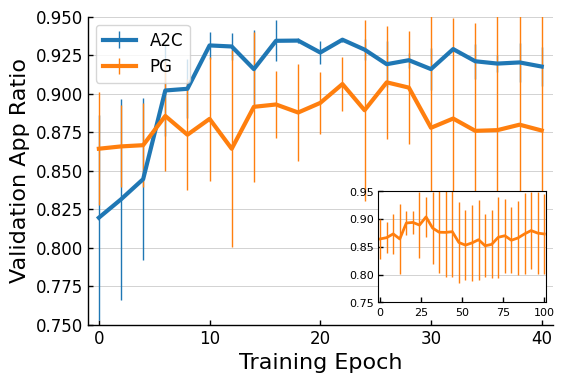

[0.9680880226934638, 0.9565170846428984]
[0.002086214237944098, 0.004023713047123129]


/tmp/ipykernel_136323/1188282874.py:161: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


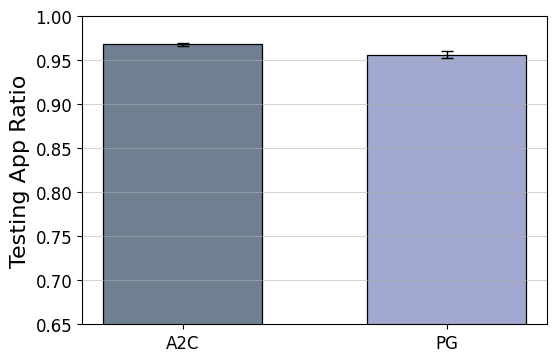

In [31]:
#PG
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file + 'UB_INV10C4'
benchmark_file = case_file + 'Benchmark_INV10'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_10 = []
    test_opt_10 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_10.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_10.append(float(line.split(':')[-1]))
train_opt_10 = np.mean(train_opt_10)
test_opt_10 = np.mean(test_opt_10)

# Main figure setup
fig, ax = plt.subplots(figsize=(6, 4))

# Load A2C data
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file + 'DRLTrainLog2024-12-13-10-40-21'

with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_a2c = []
    result_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg) / train_opt_10)
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg) / train_opt_10)
        if 'completed' in line:
            list_a2c.append(result_list[:41])
            result_list = []
list_a2c = np.array(list_a2c[:-1])
y_a2c = list_a2c.mean(0)
err_a2c = list_a2c.std(0)
steps_a2c = np.arange(41)

# Load PG data
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10PGmc/'
train_stream = train_case_file + 'DRLTrainLog2024-12-24-23-29-33'

with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_pg = []
    result_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg) / train_opt_10)
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg) / train_opt_10)
        if 'completed' in line:
            list_pg.append(result_list[:101])
            result_list = []
list_pg = np.array(list_pg[:-1])
y_pg = list_pg.mean(0)
err_pg = list_pg.std(0)
steps_pg = np.arange(101)

# Plot A2C in the main figure
ax.errorbar(steps_a2c[::2], y_a2c[::2], yerr=err_a2c[::2], errorevery=1,
            elinewidth=1, linewidth=3, label='A2C', color='tab:blue')
ax.errorbar(steps_pg[:41:2], y_pg[:41:2], yerr=err_pg[:41:2], errorevery=1,
            elinewidth=1, linewidth=3, label='PG', color='tab:orange')
ax.legend(fontsize=12)
# Set labels and title
ax.set_xlabel("Training Epoch", fontsize=16)
ax.set_ylabel('Validation App Ratio', fontsize=16)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

# Tick parameters
ax.tick_params(direction='in', width=1)
ax.set_ylim(0.75, 0.95)
ax.set_xticks(steps_pg[::10])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.grid(b=True, which='major', axis='y', linewidth=0.4)

# Create inset axes
ax_inset = inset_axes(ax, width="40%", height="40%", loc='lower right', 
                     bbox_to_anchor=(0.1, 0.05, 0.9, 0.9),  # Change the y-coordinate here
                     bbox_transform=ax.transAxes)

# Plot the first 40 points of PG data in the inset
ax_inset.errorbar(steps_pg[::4], y_pg[::4], yerr=err_pg[::4], elinewidth=1, linewidth=2, label='PG', color='tab:orange')

# Set inset labels
#ax_inset.set_xlabel("Training Epoch (Zoomed)", fontsize=10)
#ax_inset.set_ylabel('Validation Opt Ratio', fontsize=10)

ax_inset.set_xlim(-1, 101)
ax_inset.set_ylim(0.75, 0.95)
ax_inset.grid(b=True, which='major', axis='y', linewidth=0.4)
ax_inset.tick_params(direction='in', width=1)
ax_inset.tick_params(axis='x', labelsize=8)
ax_inset.tick_params(axis='y', labelsize=8)

# Customize inset ticks
ax_inset.tick_params(axis='both', labelsize=8)

ax.set_xlim(-1, 41)

# Save and show the plot
plt.savefig(r'plot/' + '003I10PG_train' + '.pdf', dpi=600, format='pdf', bbox_inches='tight')
plt.show()


#PG
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list2 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list2.append(float(line.split(',')[-7][-8:])/test_opt_10)
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10PGmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-24-23-29-33'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list5 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list5.append(float(line.split(',')[-7][-8:])/test_opt_10)
            
y = [np.mean(seller_list2),np.mean(seller_list5)]
print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list2).std(),np.array(seller_list5).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','PG'])
ax.set_ylim(0.65,1)
#ax.set_yticks(range(12,19,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )    
plt.savefig(r'plot/'+'003I10PG'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight') 
plt.show();


In [698]:
from scipy import stats
# Perform the t-test
t_stat, p_value = stats.ttest_ind(seller_list2, seller_list5)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The two lists are significantly different.")
else:
    print("The two lists are not significantly different.")

T-statistic: 5.117626842358814
P-value: 7.20245247474556e-05
The two lists are significantly different.


##### Figure EC.13

/tmp/ipykernel_136323/1310807581.py:90: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


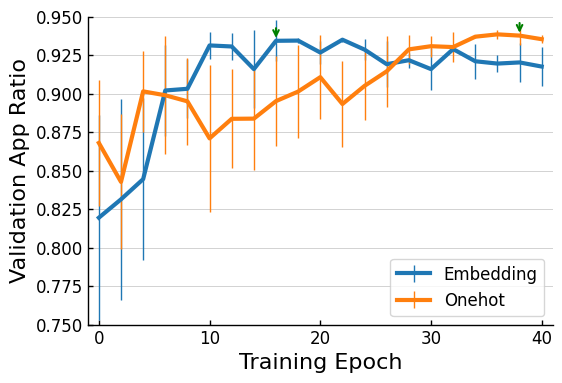

[0.9680880226934638, 0.9535651250158373]
[0.002086214237944098, 0.002627846396499848]


/tmp/ipykernel_136323/1310807581.py:127: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


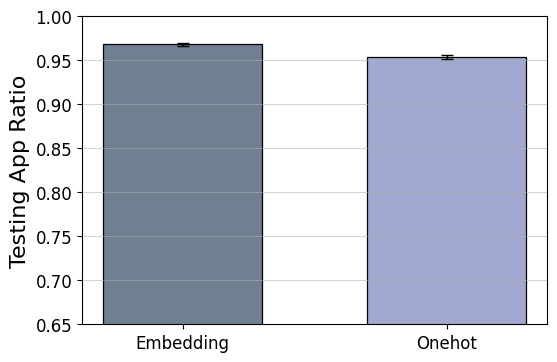

In [32]:
#onehot
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV10C4'


train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_ = []
    result_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
        if 'completed' in line:
            list_.append(result_list[:41])
            result_list = []
list_ = np.array(list_[:-1]) 
y = list_.mean(0)
err = list_.std(0)
steps = np.arange(41)
x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)
ax.errorbar(steps[::2], y[::2], yerr=err[::2],errorevery=1,elinewidth=1
             ,linewidth=3,label = 'Embedding')

# Circle the point at the 10th x-axis for the blue line
x_pos_blue = 16
y_value_blue = y[x_pos_blue]  # Get the corresponding y value
ax.annotate('', xy=(x_pos_blue, y_value_blue), xytext=(x_pos_blue, y_value_blue + 0.01),
            arrowprops=dict(arrowstyle='->',color='green', linewidth=1.5))


train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-01-18-03-33'

with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_ = []
    result_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_10)
        if 'completed' in line:
            list_.append(result_list[:41])
            result_list = []
list_ = np.array(list_[:-1]) 
y = list_.mean(0)
err = list_.std(0)
steps = np.arange(41)
x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)
ax.errorbar(steps[::2], y[::2], yerr=err[::2],errorevery=1,elinewidth=1
             ,linewidth=3,label = 'Onehot')

# Circle the point at the 10th x-axis for the blue line
x_pos_yellow = 38
y_value_yellow = y[x_pos_yellow]  # Get the corresponding y value
ax.annotate('', xy=(x_pos_yellow, y_value_yellow), xytext=(x_pos_yellow, y_value_yellow + 0.01),
            arrowprops=dict(arrowstyle='->', color='green', linewidth=1.5))

# Set labels and title
ax.set_xlabel("Training Epoch", fontsize=16)
ax.set_ylabel('Validation App Ratio', fontsize=16)
# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)  # Set bottom spine linewidth
ax.spines['left'].set_linewidth(1)    # Set left spine linewidth

# Tick parameters
ax.tick_params(direction='in', width=1)
ax.set_xlim(-1, 41)
ax.set_ylim(0.75, 0.95)
ax.set_xticks(steps[::10])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.legend(fontsize=12,loc='lower right')
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
#plt.legend(prop = {'size':12})          
plt.savefig(r'plot/'+'003I10onehot_train'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight') 
plt.show()

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-10-40-21'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list2 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list2.append(float(line.split(',')[-7][-8:])/test_opt_10)
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=10RNNmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-01-18-03-33'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list5 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list5.append(float(line.split(',')[-7][-8:])/test_opt_10)
            
y = [np.mean(seller_list2),np.mean(seller_list5)]
print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list2).std(),np.array(seller_list5).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['Embedding','Onehot'])
ax.set_ylim(0.65,1)
#ax.set_yticks(range(12,19,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )    
plt.savefig(r'plot/'+'003I10onehot'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight') 
plt.show();


#### with varying initial inventories: Figure EC.5

/tmp/ipykernel_136323/3578713686.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


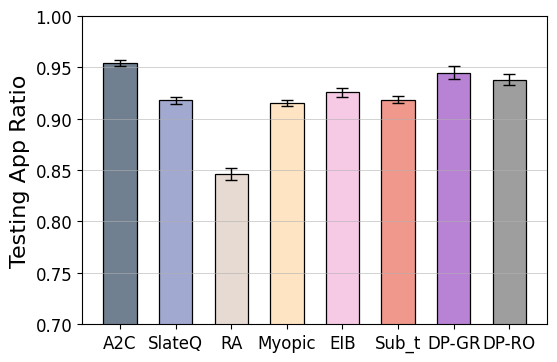

In [34]:
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV11C4'
benchmark_file = case_file+'Benchmark_INV11'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_11 = []
    test_opt_11 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_11.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_11.append(float(line.split(':')[-1]))
train_opt_11 = np.mean(train_opt_11)
test_opt_11 = np.mean(test_opt_11)

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=11RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-15-16-18-00'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_11)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_11)
            EIB_list.append(float(line.split(',')[-4])/test_opt_11)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_11)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_11)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_11)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_11)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=500INV=11DQNmc/' + 'DRLTrainLog2024-11-26-20-46-39', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_11)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I11L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


/tmp/ipykernel_136323/2643843083.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


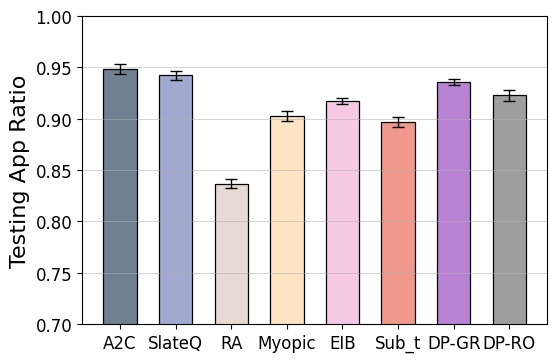

In [35]:
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV12C4'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_12 = []
    test_opt_12 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_12.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_12.append(float(line.split(':')[-1]))
train_opt_12 = np.mean(train_opt_12)
test_opt_12 = np.mean(test_opt_12)

benchmark_file = case_file+'Benchmark_INV12'
train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-23-04-49'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_12)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_12)
            EIB_list.append(float(line.split(',')[-4])/test_opt_12)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_12)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_12)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_12)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_12)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=500INV=12DQNmc/' + 'DRLTrainLog2024-11-26-20-45-10', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_12)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I12L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


/tmp/ipykernel_136323/2966788279.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


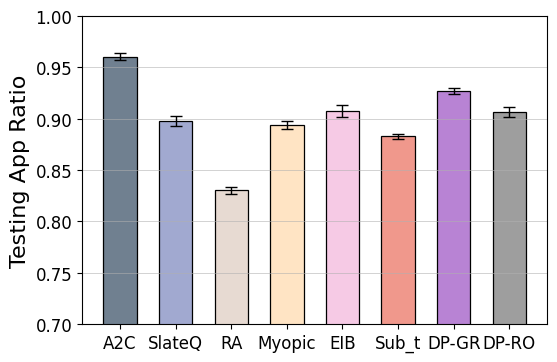

In [36]:
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV13C4'
benchmark_file = case_file+'Benchmark_INV13'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_13 = []
    test_opt_13 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_13.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_13.append(float(line.split(':')[-1]))
train_opt_13 = np.mean(train_opt_13)
test_opt_13 = np.mean(test_opt_13)

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=13RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-15-16-18-10'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_13)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_13)
            EIB_list.append(float(line.split(',')[-4])/test_opt_13)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_13)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_13)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_13)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_13)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=500INV=13DQNmc/' + 'DRLTrainLog2024-11-26-20-46-48', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_13)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I13L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


/tmp/ipykernel_136323/1403241861.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


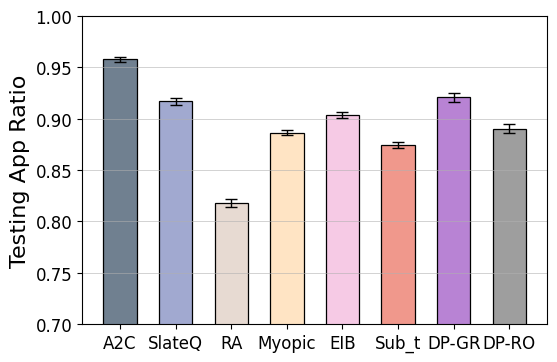

In [37]:
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV14C4'
benchmark_file = case_file+'Benchmark_INV14'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_14 = []
    test_opt_14 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_14.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_14.append(float(line.split(':')[-1]))
train_opt_14 = np.mean(train_opt_14)
test_opt_14 = np.mean(test_opt_14)

train_case_file = 'rlN=10M=4k=0.03L=100T=500INV=14RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-15-16-18-16'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_14)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_14)
            EIB_list.append(float(line.split(',')[-4])/test_opt_14)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_14)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_14)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_14)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_14)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=500INV=14DQNmc/' + 'DRLTrainLog2024-11-26-20-46-56', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_14)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I14L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


#### RNN vs MLP: Figure EC.16

[0.9482197204651174, 0.9421946885568977]
[0.0046966616347404256, 0.004034323216357466]
[0.9420981082763698, 0.9286823918919753]
[0.0025408636758663034, 0.0032987594635210922]


/tmp/ipykernel_136323/2505356674.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=True, which='major',axis='y',linewidth=0.4 )
/tmp/ipykernel_136323/2505356674.py:94: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=True, which='major',axis='y',linewidth=0.4 )


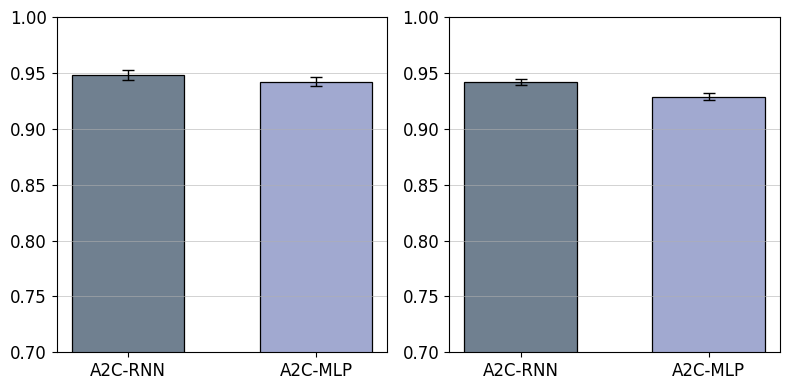

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'

#C4
UB_file = case_file+'UB_INV12C4'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

RNNtrain_case_file = 'rlN=10M=4k=0.03L=100T=500INV=12RNNmc/'
RNNtrain_stream = RNNtrain_case_file+'DRLTrainLog2024-12-13-23-04-49'
with open(r'log/' + RNNtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_RNN = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_RNN.append(float(line.split(',')[-7][-8:])/test_opt_here)

MLPtrain_case_file = 'rlN=10M=4k=0.03L=100T=500INV=12MLPmc/'
MLPtrain_stream = MLPtrain_case_file+'DRLTrainLog2024-12-15-16-23-54'
with open(r'log/' + MLPtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_MLP = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_MLP.append(float(line.split(',')[-7][-8:])/test_opt_here)
            
y = [np.mean(seller_list_RNN),np.mean(seller_list_MLP)]
print(y)
std_err = [np.array(seller_list_RNN).std(),np.array(seller_list_MLP).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数
ax[0].bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C-RNN','A2C-MLP'])
ax[0].set_ylim(0.7,1)
ax[0].tick_params(axis='x',labelsize=12)
ax[0].tick_params(axis='y',labelsize=12)
ax[0].grid(b=True, which='major',axis='y',linewidth=0.4 )


#C5
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV12C5'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)
RNNtrain_case_file = 'rlN=10M=4k=0.03L=100T=500INV=12RNNmc/'
RNNtrain_stream = RNNtrain_case_file+'DRLTrainLog2024-12-15-16-22-38'
with open(r'log/' + RNNtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_RNN = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_RNN.append(float(line.split(',')[-7][-8:])/test_opt_here)

MLPtrain_case_file = 'rlN=10M=4k=0.03L=100T=500INV=12MLPmc/'
MLPtrain_stream = MLPtrain_case_file+'DRLTrainLog2024-12-15-16-23-30'
with open(r'log/' + MLPtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_MLP = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_MLP.append(float(line.split(',')[-7][-8:])/test_opt_here)
            
y = [np.mean(seller_list_RNN),np.mean(seller_list_MLP)]
print(y)
std_err = [np.array(seller_list_RNN).std(),np.array(seller_list_MLP).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数
ax[1].bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C-RNN','A2C-MLP'])
ax[1].set_ylim(0.7,1)
ax[1].tick_params(axis='x',labelsize=12)
ax[1].tick_params(axis='y',labelsize=12)
ax[1].grid(b=True, which='major',axis='y',linewidth=0.4 )

plt.savefig(r'plot/'+'rlN10M4k003I12L100T500mc_RNNMLP'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
fig.tight_layout()
plt.show();

#### k=0: Figure EC.9

/tmp/ipykernel_136323/3471889498.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


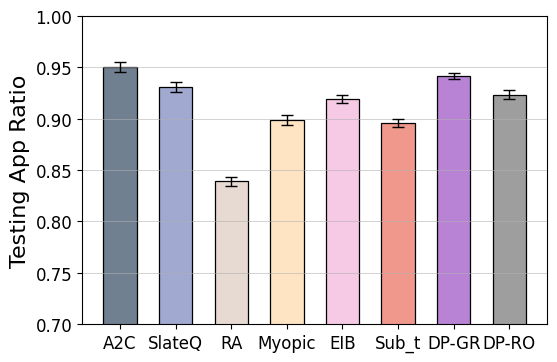

In [39]:
case_file = 'GT/rlN=10M=4k=0L=100T=500/'
UB_file = case_file+'UB_INV12C4'
benchmark_file = case_file+'Benchmark_INV12'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_k0 = []
    test_opt_k0 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_k0.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_k0.append(float(line.split(':')[-1]))
train_opt_k0 = np.mean(train_opt_k0)
test_opt_k0 = np.mean(test_opt_k0)

train_case_file = 'rlN=10M=4k=0L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-15-16-20-41'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_k0)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_k0)
            EIB_list.append(float(line.split(',')[-4])/test_opt_k0)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_k0)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_k0)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_k0)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_k0)
with open(r'log/' + 'rlN=10M=4k=0L=100T=500INV=12DQNmc/' + 'DRLTrainLog2024-11-26-20-45-42', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_k0)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k0I12L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


#### LCMNL

In [896]:
# choice models
import json
GT_folder = 'lcmnl'+ 'N=10' + 'M=4' + 'k=0.03' + 'L=100' + 'T=500'
with open('GT/'+GT_folder+'/seqdata.json', 'r') as f:
    seqdata = json.loads(f.read())
with open('GT/'+GT_folder+'/transdata.json', 'r') as f:
    transdata = json.loads(f.read())
train_sequences = list(seqdata.values())[:int(0.8*500)]
seg_prob = np.zeros(4+1)
for l in train_sequences:
    seg_prob[-1] += len(l)
    for m in range(4):
        seg_prob[m] += l.count(m)
seg_prob = (seg_prob/seg_prob[-1])[:-1]
print(seg_prob)
print("in sample:")
mnl_in_sample = [-1.473, -1.261, -1.225, -1.598]
lcmnl_in_sample = [-1.456, -1.225, -1.215, -1.591]
rcs_in_sample = [-1.452, -1.247, -1.216, -1.593]
mc_in_sample = [-1.401, -1.195, -1.159, -1.530]
assort_net_in_sample = [-1.407, -1.203, -1.164, -1.538]
average = [0,0,0,0,0]
for i in range(5):
    model = [mnl_in_sample,lcmnl_in_sample, rcs_in_sample,mc_in_sample,assort_net_in_sample][i]
    for m in range(4):
        average[i] += seg_prob[m]*model[m]
print(average)
print("out of sample:")
mnl_testing = [-1.492, -1.270, -1.206, -1.593]
lcmnl_testing = [-1.451, -1.230, -1.176, -1.564]
rcs_testing = [-1.474, -1.257, -1.206, -1.593]
mc_testing = [-1.421, -1.218, -1.150, -1.521]
assort_net_testing = [-1.431, -1.228, -1.152, -1.536]
average = [0,0,0,0,0]
for i in range(5):
    model = [mnl_testing,lcmnl_testing, rcs_testing,mc_testing,assort_net_testing][i]
    for m in range(4):
        average[i] += seg_prob[m]*model[m]
print(average)

[0.24452316 0.25409507 0.25748668 0.24389509]
in sample:
[-1.3857620339664354, -1.3681755853683046, -1.3735328610189932, -1.3178071048135866, -1.3245455984323184]
out of sample:
[-1.3865831072254045, -1.3515962968545874, -1.3788784544266908, -1.324029318661441, -1.3331889006130038]


##### Figure EC.11

/tmp/ipykernel_136323/150868534.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


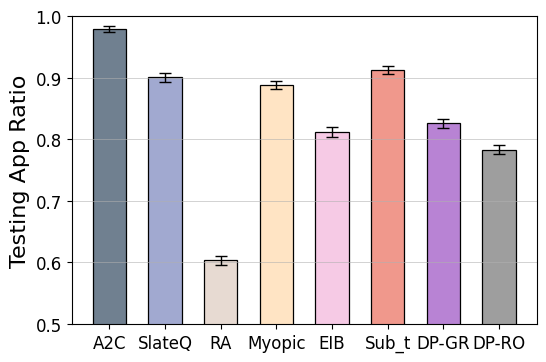

In [41]:
case_file = 'GT/lcmnlN=10M=4k=0.03L=100T=500/'
benchmark_file = case_file+'Benchmark_INV12'

UB_file = case_file+'UB_INV12C4'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

train_case_file = 'lcmnlN=10M=4k=0.03L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-14-21-50-28'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_here)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_here)
            EIB_list.append(float(line.split(',')[-4])/test_opt_here)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_here)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_here)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_here)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_here)
with open(r'log/' + 'lcmnlN=10M=4k=0.03L=100T=500INV=12DQNmc/' + 'DRLTrainLog2024-11-26-20-46-03', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_here)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.5,1)
#ax.set_yticks(range(6,14,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'lcmnlN10M4k003I12L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


###### Figure EC.10

/tmp/ipykernel_136323/3233396511.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


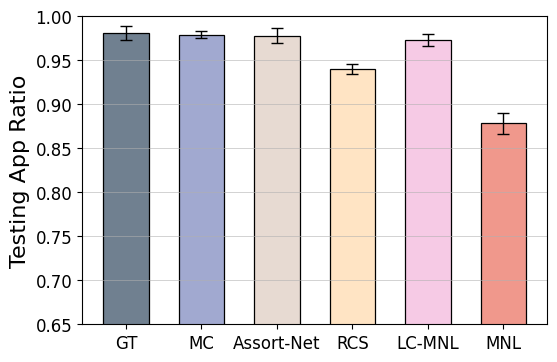

In [40]:
case_file = 'GT/lcmnlN=10M=4k=0.03L=100T=500/'
benchmark_file = case_file+'Benchmark_INV12'

UB_file = case_file+'UB_INV12C4'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

train_stream_simulator_list = []
simulator_list = ['GT','mc','net','rcs','lcmnl','mnl']
for simulator in simulator_list:
    train_stream_simulator_list.append('lcmnlN=10M=4k=0.03L=100T=500INV=12RNN'+simulator+'/')
stream_list = ['DRLTrainLog2024-12-14-21-49-54','DRLTrainLog2024-12-14-21-50-28',
              'DRLTrainLog2024-12-15-20-49-11','DRLTrainLog2024-12-14-21-50-45',
              'DRLTrainLog2025-01-13-01-35-12','DRLTrainLog2024-12-14-21-51-40']

for i in range(len(train_stream_simulator_list)):
    train_stream_simulator_list[i] += stream_list[i]
y = []
std_err = []
for stream in train_stream_simulator_list:
    with open(r'log/' + stream, 'r') as f:
        data = f.readlines()
        seller_list = []
        for line in data:
            if 'mean test reward:' in line:
                seller_list.append(float(line.split(',')[-7][-8:])/test_opt_here)
    y.append(np.mean(seller_list))
    std_err.append(np.array(seller_list).std())
            
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

simulator_list = ['GT','MC','Assort-Net','RCS','LC-MNL','MNL']
ax.bar([1,2,3,4,5,6],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=simulator_list)
ax.set_ylim(0.65,1)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'lcmnlN10M4k003I12L100T500compare'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


#### T: Figure EC.19

In [877]:
# choice models
import json
GT_folder = 'rl'+ 'N=10' + 'M=4' + 'k=0.03' + 'L=100' + 'T=50'
with open('GT/'+GT_folder+'/seqdata.json', 'r') as f:
    seqdata = json.loads(f.read())
with open('GT/'+GT_folder+'/transdata.json', 'r') as f:
    transdata = json.loads(f.read())
train_sequences = list(seqdata.values())[:int(0.8*500)]
seg_prob = np.zeros(4+1)
for l in train_sequences:
    seg_prob[-1] += len(l)
    for m in range(4):
        seg_prob[m] += l.count(m)
seg_prob = (seg_prob/seg_prob[-1])[:-1]
print(seg_prob)
print("out of sample:")
mnl_testing = [-0.767, -1.340, -1.502, -1.659]
lcmnl_testing = [-0.723, -1.229, -1.436, -1.573]
rcs_testing = [-0.804, -1.351, -1.495, -1.608]
mc_testing = [-0.658, -1.159, -1.395, -1.584]
assort_net_testing = [-0.765, -1.299, -1.486, -1.609]
average = [0,0,0,0,0]
for i in range(5):
    model = [mnl_testing,lcmnl_testing, rcs_testing,mc_testing,assort_net_testing][i]
    for m in range(4):
        average[i] += seg_prob[m]*model[m]
print(average)

[0.24343819 0.25265478 0.25505911 0.24884793]
out of sample:
[-1.3212119815668202, -1.244221198156682, -1.318521739130435, -1.2029917852133842, -1.293842917251052]


/tmp/ipykernel_136323/3640864313.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


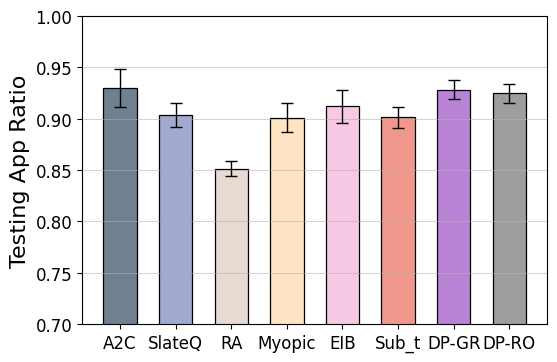

In [42]:
#T50
case_file = 'GT/rlN=10M=4k=0.03L=100T=50/'
UB_file = case_file+'UB_INV12C4'
benchmark_file = case_file+'Benchmark_INV12'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

train_case_file = 'rlN=10M=4k=0.03L=100T=50INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-29-20-22-38'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_here)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_here)
            EIB_list.append(float(line.split(',')[-4])/test_opt_here)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_here)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_here)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_here)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_here)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=50INV=12DQNmc/' + 'DRLTrainLog2024-11-26-20-45-24', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_here)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I12L100T50mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


In [878]:
# choice models
import json
GT_folder = 'rl'+ 'N=10' + 'M=4' + 'k=0.03' + 'L=100' + 'T=100'
with open('GT/'+GT_folder+'/seqdata.json', 'r') as f:
    seqdata = json.loads(f.read())
with open('GT/'+GT_folder+'/transdata.json', 'r') as f:
    transdata = json.loads(f.read())
train_sequences = list(seqdata.values())[:int(0.8*500)]
seg_prob = np.zeros(4+1)
for l in train_sequences:
    seg_prob[-1] += len(l)
    for m in range(4):
        seg_prob[m] += l.count(m)
seg_prob = (seg_prob/seg_prob[-1])[:-1]
print(seg_prob)
print("out of sample:")
mnl_testing = [-0.714, -1.295, -1.573, -1.672]
lcmnl_testing = [-0.705, -1.193, -1.474, -1.603]
rcs_testing = [-0.720, -1.312, -1.555, -1.661]
mc_testing = [-0.626, -1.130, -1.424, -1.621]
assort_net_testing = [-0.653, -1.207, -1.500, -1.600]
average = [0,0,0,0,0]
for i in range(5):
    model = [mnl_testing,lcmnl_testing, rcs_testing,mc_testing,assort_net_testing][i]
    for m in range(4):
        average[i] += seg_prob[m]*model[m]
print(average)

[0.24472658 0.25062481 0.25912226 0.24552634]
out of sample:
[-1.3174132760171948, -1.2470525842247326, -1.3157772668199539, -1.2033931820453865, -1.2438361491552534]


/tmp/ipykernel_136323/4082131392.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


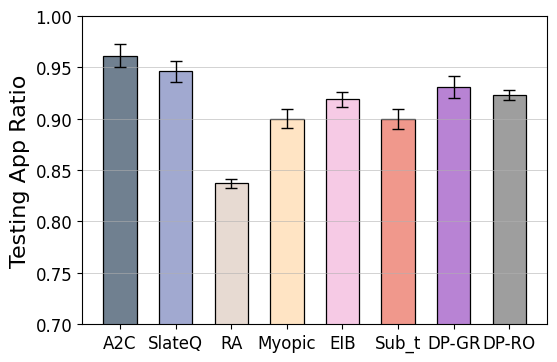

In [43]:
#T100
case_file = 'GT/rlN=10M=4k=0.03L=100T=100/'
UB_file = case_file+'UB_INV12C4'
benchmark_file = case_file+'Benchmark_INV12'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

train_case_file = 'rlN=10M=4k=0.03L=100T=100INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-16-11-46-50'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_here)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_here)
            EIB_list.append(float(line.split(',')[-4])/test_opt_here)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_here)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_here)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_here)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_here)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=100INV=12DQNmc/' + 'DRLTrainLog2024-11-26-20-45-17', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_here)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I12L100T100mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


In [879]:
# choice models
import json
GT_folder = 'rl'+ 'N=10' + 'M=4' + 'k=0.03' + 'L=100' + 'T=1000'
with open('GT/'+GT_folder+'/seqdata.json', 'r') as f:
    seqdata = json.loads(f.read())
with open('GT/'+GT_folder+'/transdata.json', 'r') as f:
    transdata = json.loads(f.read())
train_sequences = list(seqdata.values())[:int(0.8*500)]
seg_prob = np.zeros(4+1)
for l in train_sequences:
    seg_prob[-1] += len(l)
    for m in range(4):
        seg_prob[m] += l.count(m)
seg_prob = (seg_prob/seg_prob[-1])[:-1]
print(seg_prob)
print("out of sample:")
mnl_testing = [-0.736, -1.325, -1.594, -1.669]
lcmnl_testing = [-0.730, -1.327, -1.591, -1.656]
rcs_testing = [-0.758, -1.326, -1.568, -1.646]
mc_testing = [-0.637, -1.171, -1.454, -1.549]
assort_net_testing = [-0.640, -1.178, -1.479, -1.563]
average = [0,0,0,0,0]
for i in range(5):
    model = [mnl_testing,lcmnl_testing, rcs_testing,mc_testing,assort_net_testing][i]
    for m in range(4):
        average[i] += seg_prob[m]*model[m]
print(average)

[0.24368734 0.25446597 0.25748097 0.24436572]
out of sample:
[-1.3347923419009573, -1.329889952513756, -1.3280930127383734, -1.2061083138614608, -1.2184787819401524]


/tmp/ipykernel_136323/2527547001.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


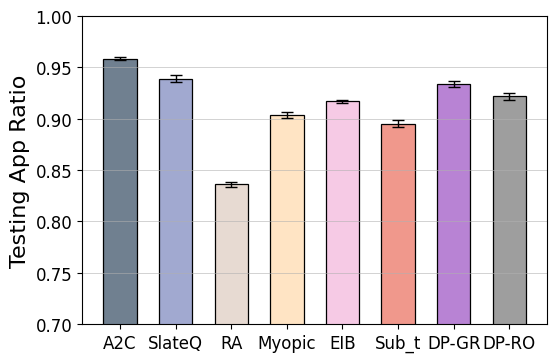

In [44]:
#T1000
case_file = 'GT/rlN=10M=4k=0.03L=100T=1000/'
UB_file = case_file+'UB_INV12C4'
benchmark_file = case_file+'Benchmark_INV12'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

train_case_file = 'rlN=10M=4k=0.03L=100T=1000INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-15-15-28-59'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_here)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_here)
            EIB_list.append(float(line.split(',')[-4])/test_opt_here)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_here)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_here)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_here)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_here)
with open(r'log/' + 'rlN=10M=4k=0.03L=100T=1000INV=12DQNmc/' + 'DRLTrainLog2024-11-26-20-44-51', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_here)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(0.6,1,0.05),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I12L100T1000mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


#### M20

##### Figure EC.7

/tmp/ipykernel_136323/1744737983.py:68: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


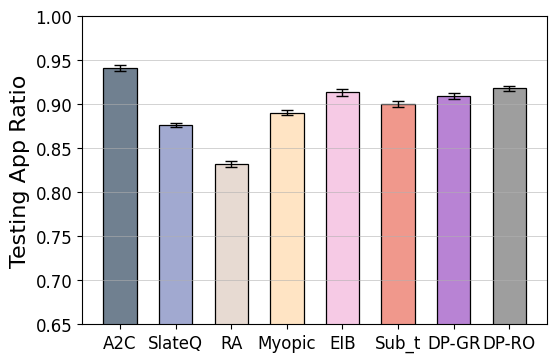

In [45]:
case_file = 'GT/rlN=10M=20k=0.03L=100T=500/'
UB_file = case_file+'UB_INV12C4'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_k0 = []
    test_opt_k0 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_k0.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_k0.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_k0)
test_opt_here = np.mean(test_opt_k0)


case_file = 'GT/rlN=10M=20k=0.03L=100T=500/'
benchmark_file = case_file+'Benchmark_INV12'

train_case_file = 'rlN=10M=20k=0.03L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-10-15-54-30'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_here)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_here)
            EIB_list.append(float(line.split(',')[-4])/test_opt_here)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_here)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_here)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_here)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_here)
with open(r'log/' + 'rlN=10M=20k=0.03L=100T=500INV=12DQNmc/' + 'DRLTrainLog2024-11-26-20-43-15', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_here)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],np.array(y),width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.65,1)
#ax.set_yticks(range(10,17,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M20k003I12L100T500mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


##### Figure EC.13

/tmp/ipykernel_136323/1675414343.py:90: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


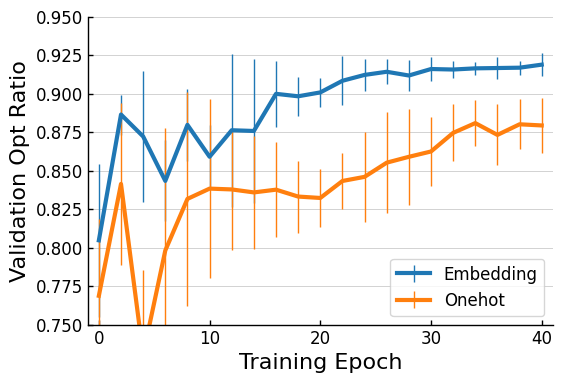

[0.9407043045327326, 0.9183754755604221]
[0.0033421411665819824, 0.005099388197885705]


/tmp/ipykernel_136323/1675414343.py:127: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


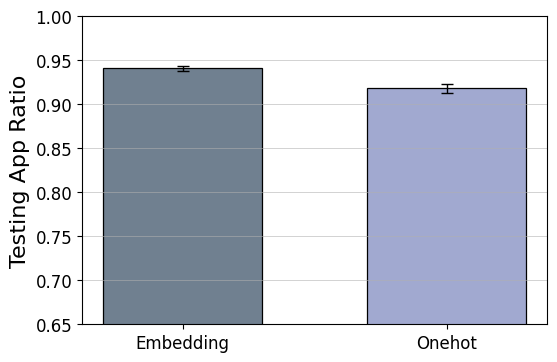

In [46]:
#onehot
case_file = 'GT/rlN=10M=20k=0.03L=100T=500/'
UB_file = case_file+'UB_INV12C4'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_k0 = []
    test_opt_k0 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_k0.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_k0.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_k0)
test_opt_here = np.mean(test_opt_k0)


train_case_file = 'rlN=10M=20k=0.03L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-10-15-54-30'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_ = []
    result_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_here)
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_here)
        if 'completed' in line:
            list_.append(result_list[:41])
            result_list = []
list_ = np.array(list_[:-1]) 
y = list_.mean(0)
err = list_.std(0)
steps = np.arange(41)
x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)
ax.errorbar(steps[::2], y[::2], yerr=err[::2],errorevery=1,elinewidth=1
             ,linewidth=3,label = 'Embedding')


train_case_file = 'rlN=10M=20k=0.03L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-11-20-37-14'

with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    list_ = []
    result_list = []
    for line in data:
        if 'initial mean reward' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_here)
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg)/train_opt_here)
        if 'completed' in line:
            list_.append(result_list[:41])
            result_list = []
list_ = np.array(list_[:-1]) 
y = list_.mean(0)
err = list_.std(0)
steps = np.arange(41)
x_major_locator=MultipleLocator(4)
ax.xaxis.set_major_locator(x_major_locator)
ax.errorbar(steps[::2], y[::2], yerr=err[::2],errorevery=1,elinewidth=1
             ,linewidth=3,label = 'Onehot')

# Set labels and title
ax.set_xlabel("Training Epoch", fontsize=16)
ax.set_ylabel('Validation Opt Ratio', fontsize=16)
# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)  # Set bottom spine linewidth
ax.spines['left'].set_linewidth(1)    # Set left spine linewidth

# Tick parameters
ax.tick_params(direction='in', width=1)
ax.set_xlim(-1, 41)
ax.set_ylim(0.75, 0.95)
ax.set_xticks(steps[::10])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.legend(fontsize=12,loc='lower right')
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
#plt.legend(prop = {'size':12})          
plt.savefig(r'plot/'+'003M20onehot_train'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight') 
plt.show()

train_case_file = 'rlN=10M=20k=0.03L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-10-15-54-30'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list2 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list2.append(float(line.split(',')[-7][-8:])/test_opt_here)
train_case_file = 'rlN=10M=20k=0.03L=100T=500INV=12RNNmc/'
train_stream = train_case_file+'DRLTrainLog2025-01-11-20-37-14'
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list5 = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list5.append(float(line.split(',')[-7][-8:])/test_opt_here)
            
y = [np.mean(seller_list2),np.mean(seller_list5)]
print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list2).std(),np.array(seller_list5).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['Embedding','Onehot'])
ax.set_ylim(0.65,1)
#ax.set_yticks(range(12,19,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )    
plt.savefig(r'plot/'+'003M20onehot'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight') 
plt.show();


#### L500: Figure EC.8

/tmp/ipykernel_136323/2268789908.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


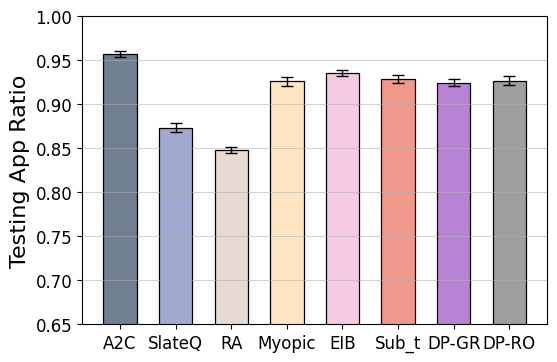

In [47]:
#L500
case_file = 'GT/rlN=10M=4k=0.03L=500T=100/'
benchmark_file = case_file+'Benchmark_INV60'

with open(case_file+'UB_INV60C4', 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)


train_case_file = 'rlN=10M=4k=0.03L=500T=100INV=60RNNmc/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-23-12-53'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/test_opt_here)
            Myopic_list.append(float(line.split(',')[-5])/test_opt_here)
            EIB_list.append(float(line.split(',')[-4])/test_opt_here)
            Sub_t_list.append(float(line.split(',')[-3])/test_opt_here)
            DP_Greedy_list.append(float(line.split(',')[-2])/test_opt_here)
            DP_Rollout_list.append(float(line.split(',')[-1])/test_opt_here)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/test_opt_here)
with open(r'log/' + 'rlN=10M=4k=0.03L=500T=100INV=60DQNmc/' + 'DRLTrainLog2024-11-26-20-44-32', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_here)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.65,1)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN10M4k003I60L500T100mc'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


#### N20

##### Figure EC.6

/tmp/ipykernel_136323/1999241585.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


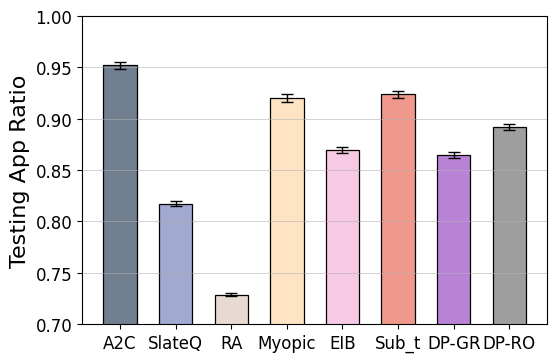

In [48]:
case_file = 'GT/rlN=20M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV8C4'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

case_file = 'GT/rlN=20M=4k=0.03L=100T=500/'
benchmark_file = case_file+'Benchmark_INV8'

train_case_file = 'rlN=20M=4k=0.03L=100T=500INV=8RNNnet/'
train_stream = train_case_file+'DRLTrainLog2024-12-13-23-08-14'
with open(benchmark_file, 'r') as f:
    data = f.readlines()
    Random_list = []
    Myopic_list = []
    EIB_list = []
    Sub_t_list = []
    DP_Greedy_list = []
    DP_Rollout_list = []
    for line in data:
        if 'mean test reward:' in line:
            Random_list.append(float(line.split(',')[-6])/train_opt_here)
            Myopic_list.append(float(line.split(',')[-5])/train_opt_here)
            EIB_list.append(float(line.split(',')[-4])/train_opt_here)
            Sub_t_list.append(float(line.split(',')[-3])/train_opt_here)
            DP_Greedy_list.append(float(line.split(',')[-2])/train_opt_here)
            DP_Rollout_list.append(float(line.split(',')[-1])/train_opt_here)
with open(r'log/' + train_stream, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-7][-8:])/train_opt_here)
with open(r'log/' + 'rlN=20M=4k=0.03L=100T=500INV=8DQNnet/' + 'DRLTrainLog2024-11-30-15-44-08', 'r') as f:
    data = f.readlines()
    DQN_seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            DQN_seller_list.append(float(line.split(',')[-1][-8:])/test_opt_here)
            
y = [np.mean(seller_list),np.mean(DQN_seller_list),np.mean(Random_list),np.mean(Myopic_list),np.mean(EIB_list), np.mean(Sub_t_list), np.mean(DP_Greedy_list)
    , np.mean(DP_Rollout_list)]
#print(y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
std_err = [np.array(seller_list).std(),np.array(DQN_seller_list).std(),np.array(Random_list).std(),(np.array(Myopic_list).std()),(np.array(EIB_list).std()),(np.array(Sub_t_list).std()),
           (np.array(DP_Greedy_list).std()),(np.array(DP_Rollout_list).std())]
#print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4,5,6,7,8],y,width=0.6,color=['slategray','#A1A9D0','#E7DAD2','bisque','#F6CAE5','#F0988C','#B883D4','#9E9E9E']#
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C','SlateQ','RA', 'Myopic', 'EIB', 'Sub_t','DP-GR','DP-RO'])
ax.set_ylim(0.7,1)
#ax.set_yticks(range(12,19,1),size=12)
plt.ylabel('Testing App Ratio',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'rlN20M4k003I12L100T500net'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show();


##### Figure EC.16

[0.9518215562364218, 0.9396840099849204]
[0.003296945800756517, 0.0027099155500917003]
[0.9450161273885385, 0.9377332604466826]
[0.003712165778956608, 0.0018814907879811968]
[0.9407675227927026, 0.9054702690574146]
[0.002590889197971232, 0.004581573627317575]


/tmp/ipykernel_136323/2038096155.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=True, which='major',axis='y',linewidth=0.4 )
/tmp/ipykernel_136323/2038096155.py:96: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=True, which='major',axis='y',linewidth=0.4 )
/home/go3/.conda/envs/ass/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/go3/.conda/envs/ass/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_136323/2038096155.py:143: MatplotlibDeprecationWarning: The 'b' parameter of grid() h

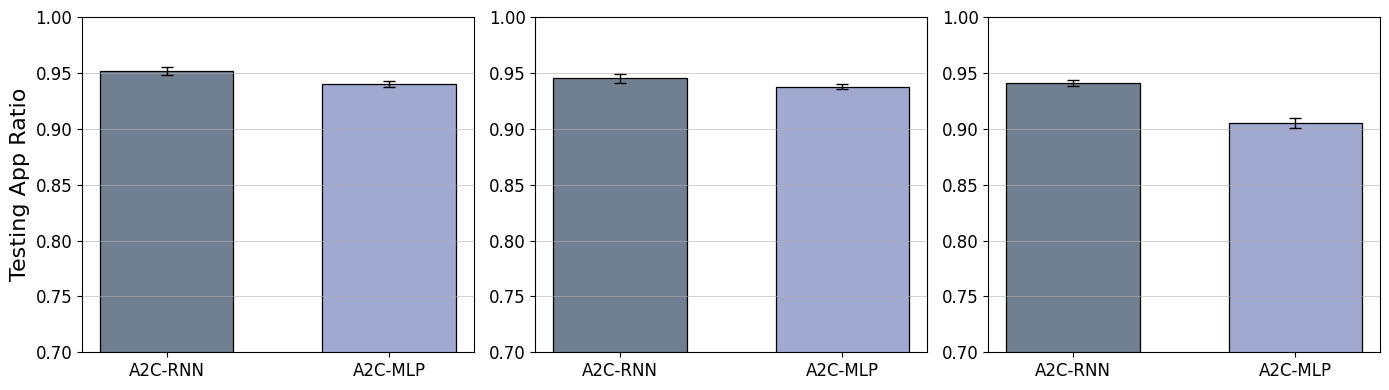

In [49]:
#inv8
#C4
case_file = 'GT/rlN=20M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV8C4'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

RNNtrain_case_file = 'rlN=20M=4k=0.03L=100T=500INV=8RNNnet/'
RNNtrain_stream = RNNtrain_case_file+'DRLTrainLog2024-12-13-23-08-14'
with open(r'log/' + RNNtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_RNN = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_RNN.append(float(line.split(',')[-7][-8:])/train_opt_here)

MLPtrain_case_file = 'rlN=20M=4k=0.03L=100T=500INV=8MLPnet/'
MLPtrain_stream = MLPtrain_case_file+'DRLTrainLog2024-12-22-17-15-07'
with open(r'log/' + MLPtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_MLP = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_MLP.append(float(line.split(',')[-7][-8:])/train_opt_here)

y = [np.mean(seller_list_RNN),np.mean(seller_list_MLP)]
print(y)
std_err = [np.array(seller_list_RNN).std(),np.array(seller_list_MLP).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数
ax[0].bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C-RNN','A2C-MLP'])
ax[0].set_ylim(0.7,1)
ax[0].set_ylabel('Testing App Ratio',size=16)
ax[0].tick_params(axis='x',labelsize=12)
ax[0].tick_params(axis='y',labelsize=12)
ax[0].grid(b=True, which='major',axis='y',linewidth=0.4 )


#C7
case_file = 'GT/rlN=20M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV8C7'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

RNNtrain_case_file = 'rlN=20M=4k=0.03L=100T=500INV=8RNNnet/'
RNNtrain_stream = RNNtrain_case_file+'DRLTrainLog2024-12-06-20-50-34'
with open(r'log/' + RNNtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_RNN = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_RNN.append(float(line.split(',')[-7][-8:])/train_opt_here)

MLPtrain_case_file = 'rlN=20M=4k=0.03L=100T=500INV=8MLPnet/'
MLPtrain_stream = MLPtrain_case_file+'DRLTrainLog2024-12-06-20-51-23'
with open(r'log/' + MLPtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_MLP = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_MLP.append(float(line.split(',')[-7][-8:])/train_opt_here)
            
y = [np.mean(seller_list_RNN),np.mean(seller_list_MLP)]
print(y)
std_err = [np.array(seller_list_RNN).std(),np.array(seller_list_MLP).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数
ax[1].bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C-RNN','A2C-MLP'])
ax[1].set_ylim(0.7,1)
ax[1].tick_params(axis='x',labelsize=12)
ax[1].tick_params(axis='y',labelsize=12)
ax[1].grid(b=True, which='major',axis='y',linewidth=0.4 )


#C10
case_file = 'GT/rlN=20M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV8C10'
with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_here = []
    test_opt_here = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_here.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_here.append(float(line.split(':')[-1]))
train_opt_here = np.mean(train_opt_here)
test_opt_here = np.mean(test_opt_here)

RNNtrain_case_file = 'rlN=20M=4k=0.03L=100T=500INV=8RNNnet/'
RNNtrain_stream = RNNtrain_case_file+'DRLTrainLog2024-12-15-16-29-36'
with open(r'log/' + RNNtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_RNN = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_RNN.append(float(line.split(',')[-7][-8:])/train_opt_here)

MLPtrain_case_file = 'rlN=20M=4k=0.03L=100T=500INV=8MLPnet/'
MLPtrain_stream = MLPtrain_case_file+'DRLTrainLog2024-12-15-16-26-49'
with open(r'log/' + MLPtrain_stream, 'r') as f:
    data = f.readlines()
    seller_list_MLP = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list_MLP.append(float(line.split(',')[-7][-8:])/train_opt_here)
            
y = [np.mean(seller_list_RNN),np.mean(seller_list_MLP)]
print(y)
std_err = [np.array(seller_list_RNN).std(),np.array(seller_list_MLP).std()]
print(std_err)
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数
ax[2].bar([1,2],y,width=0.6,color=['slategray','#A1A9D0']
       ,edgecolor='black',linewidth=0.9,
       yerr=std_err,error_kw=error_params,tick_label=['A2C-RNN','A2C-MLP'])
ax[2].set_ylim(0.7,1)
ax[2].tick_params(axis='x',labelsize=12)
ax[2].tick_params(axis='y',labelsize=12)
ax[2].grid(b=True, which='major',axis='y',linewidth=0.4 )

plt.savefig(r'plot/'+'rlN20M4k003I12L100T500net_RNNMLP'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
fig.tight_layout()
plt.show();

### Interpretation

In [680]:
folder = 'log/rlN=10M=4k=0.03L=100T=500INV=10RNNmc/DRLTrainLog2024-12-13-10-40-21change'

In [681]:
#test_value_list
test_value_array_list = []
for i in range(10):
    file_name = folder+'/test_value_list'+str(i)+'.npy'
    test_value_array_list.append(np.load(file_name))
test_value_array = np.concatenate(test_value_array_list, axis=0)
test_value_array.shape

(1000, 109)

#### value, reward

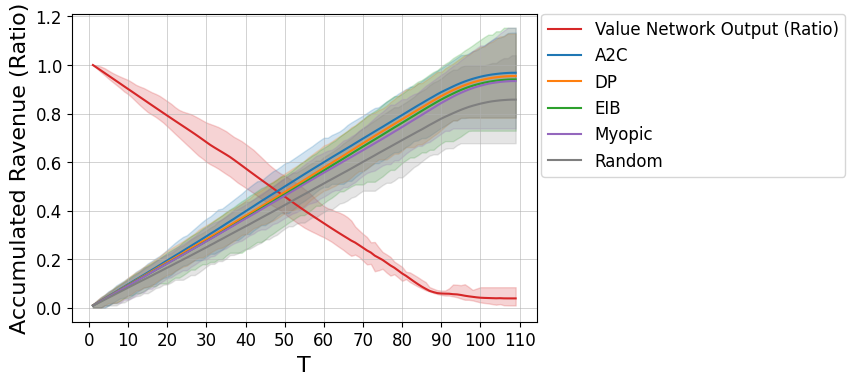

In [814]:
#change_of_R_list
case_file = 'GT/rlN=10M=4k=0.03L=100T=500/'
UB_file = case_file+'UB_INV10C4'
benchmark_file = case_file+'Benchmark_INV10'

with open(UB_file, 'r') as f:
    data = f.readlines()
    train_opt_10 = []
    test_opt_10 = []
    for line in data:
        if 'training upper bound' in line:
            train_opt_10.append(float(line.split(':')[-1]))
        if 'testing upper bound' in line:
            test_opt_10.append(float(line.split(':')[-1]))
train_opt_10 = np.mean(train_opt_10)
test_opt_10 = np.mean(test_opt_10)

array_list = []
for i in range(10):
    file_name = folder+'/change_of_R_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)
array.shape
plt.figure(figsize=(6,4))

######################################################################################################
plt_test_value_array = []
for i in range(len(test_value_array)):
    plt_test_value_array.append(smooth(test_value_array[i],5))
max_values = np.max(plt_test_value_array, axis=0)
max_values = max_values/max_values[0]
min_values = np.min(plt_test_value_array, axis=0)
min_values = min_values/min_values[0]

# Optional: Add labels and title
x = np.arange(array.shape[1])+1  # X values (column indices)
plt.plot(x, np.mean(plt_test_value_array, axis=0)/np.mean(plt_test_value_array, axis=0)[0], label='Value Network Output (Ratio)', color='tab:red')

# Fill the area between the max and min lines
plt.fill_between(x, min_values, max_values, color='tab:red', alpha=0.2)

######################################################################################################
# Optional: Add labels and title
max_values = np.max(array, axis=0)
min_values = np.min(array, axis=0)

# Optional: Add labels and title
x = np.arange(array.shape[1])+1  # X values (column indices)
plt.plot(x, np.mean(array, axis=0)/test_opt_10, label='A2C', color='tab:blue')

# Fill the area between the max and min lines
plt.fill_between(x, min_values/test_opt_10, max_values/test_opt_10, color='tab:blue', alpha=0.2)

######################################################################################################
array_list = []
for i in range(10):
    file_name = folder+'/DP_Greedy_seller_change_of_R_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)
max_values = np.max(array, axis=0)
min_values = np.min(array, axis=0)

# Optional: Add labels and title
x = np.arange(array.shape[1])+1  # X values (column indices)
plt.plot(x, np.mean(array, axis=0)/test_opt_10, label='DP', color='tab:orange')

# Fill the area between the max and min lines
plt.fill_between(x, min_values/test_opt_10, max_values/test_opt_10, color='tab:orange', alpha=0.2)
######################################################################################################
array_list = []
for i in range(10):
    file_name = folder+'/E_IB_seller_change_of_R_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)
max_values = np.max(array, axis=0)
min_values = np.min(array, axis=0)

# Optional: Add labels and title
x = np.arange(array.shape[1])+1  # X values (column indices)
plt.plot(x, np.mean(array, axis=0)/test_opt_10, label='EIB', color='tab:green')

# Fill the area between the max and min lines
plt.fill_between(x, min_values/test_opt_10, max_values/test_opt_10, color='tab:green', alpha=0.2)
######################################################################################################
array_list = []
for i in range(10):
    file_name = folder+'/myopic_seller_change_of_R_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)
max_values = np.max(array, axis=0)
min_values = np.min(array, axis=0)

# Optional: Add labels and title
x = np.arange(array.shape[1])+1  # X values (column indices)
plt.plot(x, np.mean(array, axis=0)/test_opt_10, label='Myopic', color='tab:purple')

# Fill the area between the max and min lines
plt.fill_between(x, min_values/test_opt_10, max_values/test_opt_10, color='tab:purple', alpha=0.2)
######################################################################################################
array_list = []
for i in range(10):
    file_name = folder+'/OA_seller_change_of_R_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)
max_values = np.max(array, axis=0)
min_values = np.min(array, axis=0)

# Optional: Add labels and title
x = np.arange(array.shape[1])+1  # X values (column indices)
plt.plot(x, np.mean(array, axis=0)/test_opt_10, label='Random', color='tab:gray')

# Fill the area between the max and min lines
plt.fill_between(x, min_values/test_opt_10, max_values/test_opt_10, color='tab:gray', alpha=0.2)
######################################################################################################


plt.xlabel('T',size=16)
plt.xticks(range(0, 111, 10))
plt.ylabel('Accumulated Ravenue (Ratio)',size=16)
plt.grid(True,linewidth=0.4 )  # Optional: add a grid

#plt.legend(fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1.01,1),borderaxespad = 0.) 

plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
# Show the plot
plt.savefig(r'plot/'+'rlN10M4k003I10L100T500mc_value'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')      
plt.show()

#### offer, purchase prob

In [718]:
#offer_matrix
array_list = []
for i in range(10):
    file_name = folder+'/offer_matrix'+str(i)+'.npy'
    array_list.append(np.load(file_name))
offer_matrix = np.mean(array_list, axis=0)[:-1]
offer_matrix.shape

(10, 110)

In [731]:
print(offer_matrix[:,:20].mean(1))
print(array.mean(0)[:20,:].mean(0))

[0.      0.7785  0.      0.      0.      0.22155 0.99995 0.      1.
 1.     ]
[1.       0.380345 1.       1.       1.       0.984365 0.873065 1.
 0.91524  0.915875]


In [732]:
print(offer_matrix[:,20:40].mean(1))
print(array.mean(0)[20:40,:].mean(0))

[0.0000e+00 8.6500e-03 0.0000e+00 1.0000e-04 0.0000e+00 9.9025e-01
 9.9355e-01 9.5900e-02 9.1270e-01 9.9885e-01]
[1.00000e+00 6.55000e-04 1.00000e+00 9.99990e-01 1.00000e+00 7.12915e-01
 6.31235e-01 9.78780e-01 4.21150e-01 7.14830e-01]


In [733]:
print(offer_matrix[:,40:60].mean(1))
print(array.mean(0)[40:60,:].mean(0))

[0.01005 0.      0.      0.2029  0.      0.8809  0.9148  0.69895 0.34625
 0.9459 ]
[0.99891  0.       1.       0.955915 1.       0.383765 0.4188   0.591235
 0.081535 0.4363  ]


In [734]:
print(offer_matrix[:,60:80].mean(1))
print(array.mean(0)[60:80,:].mean(0))

[5.4975e-01 0.0000e+00 2.5000e-04 8.1520e-01 0.0000e+00 4.6065e-01
 7.5755e-01 4.5315e-01 1.0530e-01 7.0085e-01]
[0.83768  0.       0.99997  0.52475  1.       0.12088  0.27256  0.184755
 0.022215 0.237875]


In [735]:
print(offer_matrix[:,80:100].mean(1))
print(array.mean(0)[80:100,:].mean(0))

[0.5975  0.      0.513   0.36215 0.31315 0.08125 0.3787  0.21915 0.02465
 0.3472 ]
[0.27012  0.       0.868905 0.112485 0.91889  0.01683  0.119145 0.076995
 0.00634  0.10783 ]


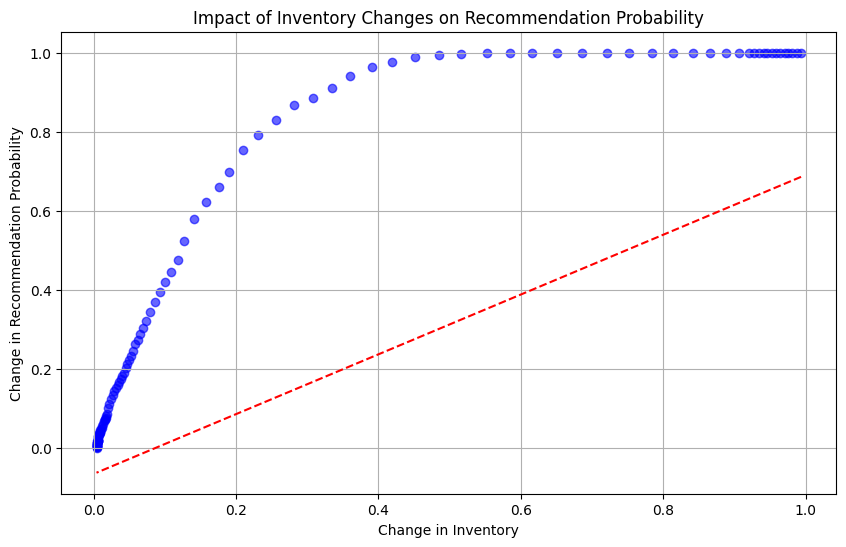

In [730]:
# Sample data: Replace these with your actual lists
inventory_changes = array.mean(0)[:,8]
recommendation_changes = offer_matrix[8,:-1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(inventory_changes, recommendation_changes, color='blue', alpha=0.6)

# Adding a line of best fit
m, b = np.polyfit(recommendation_changes, inventory_changes, 1)
plt.plot(inventory_changes, m * inventory_changes + b, color='red', linestyle='dashed')

# Adding titles and labels
plt.title('Impact of Inventory Changes on Recommendation Probability')
plt.xlabel('Change in Inventory')
plt.ylabel('Change in Recommendation Probability')
plt.grid()

# Show the plot
plt.show()

In [274]:
#purchase_matrix
purchase_array_list = []
for i in range(10):
    file_name = folder+'/purchase_matrix'+str(i)+'.npy'
    purchase_array_list.append(np.load(file_name))
purchase_array = np.mean(purchase_array_list, axis=0)
purchase_array.shape

(11, 110)

In [275]:
purchase_array

array([[0.107, 0.101, 0.111, ..., 0.038, 0.   , 0.   ],
       [0.659, 0.718, 0.708, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.042, 0.043, 0.032, ..., 0.   , 0.   , 0.   ],
       [0.086, 0.056, 0.056, ..., 0.   , 0.   , 0.   ]])

In [276]:
products_price = np.load('GT/rlN=10M=4k=0.03L=100T=500/prices.npy')

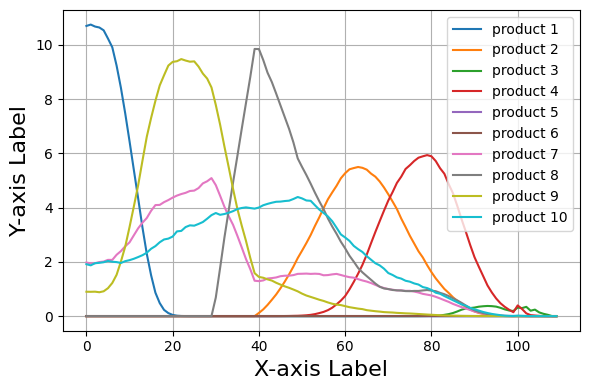

In [256]:
plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod])*(products_price[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

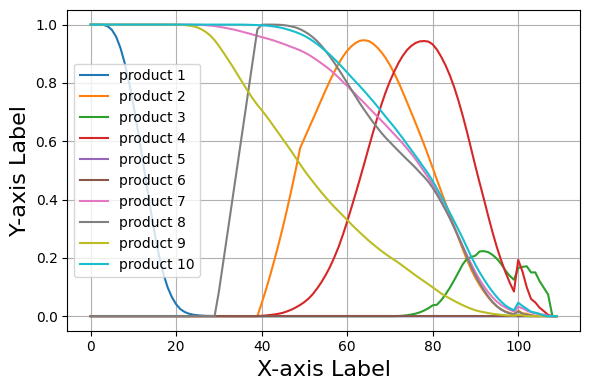

In [283]:
plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth((array[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

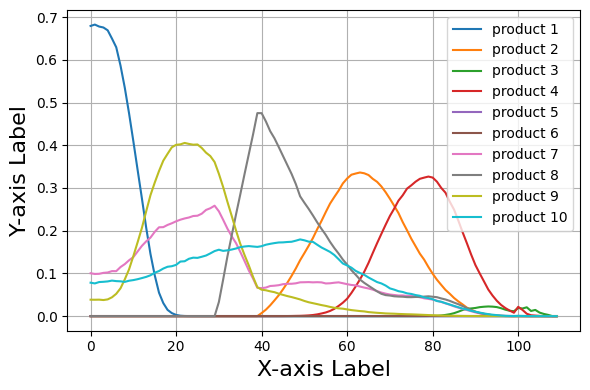

In [277]:
plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

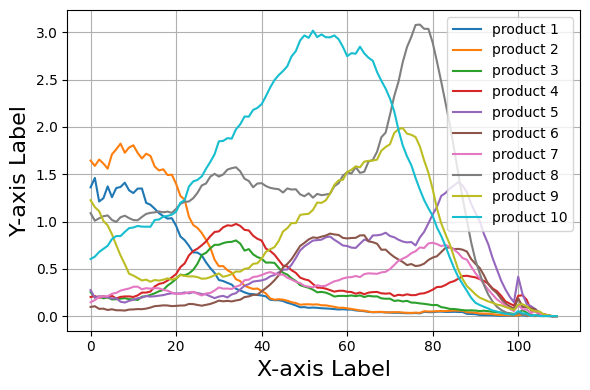

In [257]:
#offer_matrix
array_list = []
for i in range(10):
    file_name = folder+'/DP_Greedy_seller_offer_matrix'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.mean(array_list, axis=0)[:-1]
array.shape
#purchase_matrix
purchase_array_list = []
for i in range(10):
    file_name = folder+'/DP_Greedy_seller_purchase_matrix'+str(i)+'.npy'
    purchase_array_list.append(np.load(file_name))
purchase_array = np.mean(purchase_array_list, axis=0)
purchase_array.shape

plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod])*(products_price[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

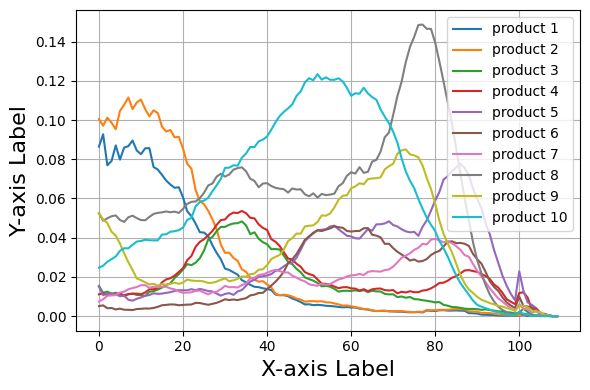

In [278]:
#offer_matrix
array_list = []
for i in range(10):
    file_name = folder+'/DP_Greedy_seller_offer_matrix'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.mean(array_list, axis=0)[:-1]
array.shape
#purchase_matrix
purchase_array_list = []
for i in range(10):
    file_name = folder+'/DP_Greedy_seller_purchase_matrix'+str(i)+'.npy'
    purchase_array_list.append(np.load(file_name))
purchase_array = np.mean(purchase_array_list, axis=0)
purchase_array.shape

plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

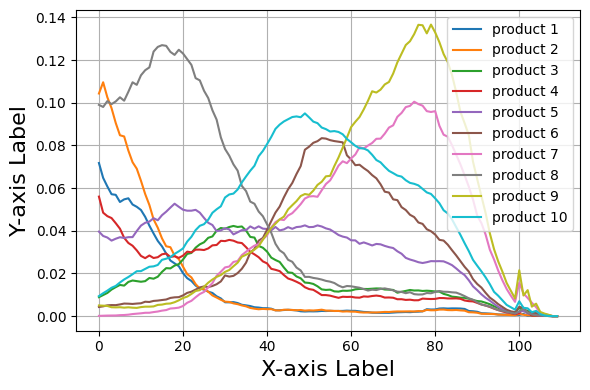

In [279]:
#offer_matrix
array_list = []
for i in range(10):
    file_name = folder+'/E_IB_seller_offer_matrix'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.mean(array_list, axis=0)[:-1]
array.shape
#purchase_matrix
purchase_array_list = []
for i in range(10):
    file_name = folder+'/E_IB_seller_purchase_matrix'+str(i)+'.npy'
    purchase_array_list.append(np.load(file_name))
purchase_array = np.mean(purchase_array_list, axis=0)
purchase_array.shape

plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

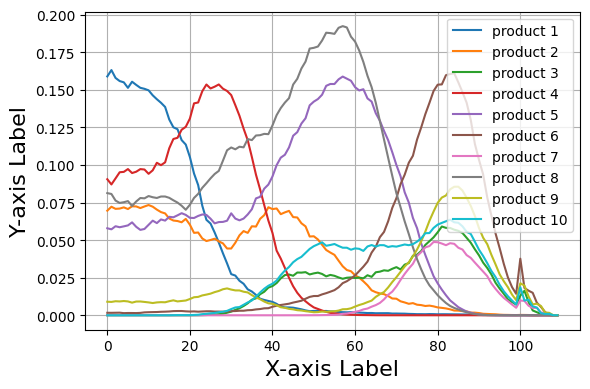

In [280]:
#offer_matrix
array_list = []
for i in range(10):
    file_name = folder+'/myopic_seller_offer_matrix'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.mean(array_list, axis=0)[:-1]
array.shape
#purchase_matrix
purchase_array_list = []
for i in range(10):
    file_name = folder+'/myopic_seller_purchase_matrix'+str(i)+'.npy'
    purchase_array_list.append(np.load(file_name))
purchase_array = np.mean(purchase_array_list, axis=0)
purchase_array.shape

plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

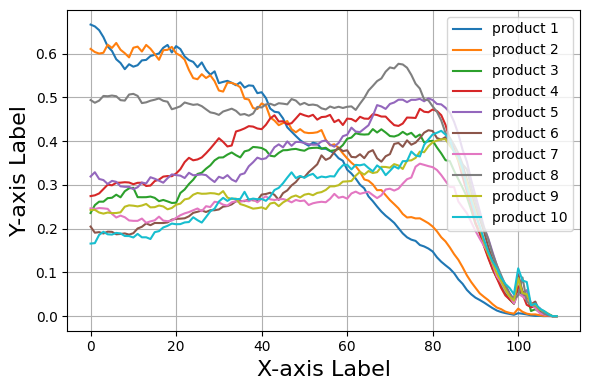

In [258]:
#offer_matrix
array_list = []
for i in range(10):
    file_name = folder+'/OA_seller_offer_matrix'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.mean(array_list, axis=0)[:-1]
array.shape
#purchase_matrix
purchase_array_list = []
for i in range(10):
    file_name = folder+'/OA_seller_purchase_matrix'+str(i)+'.npy'
    purchase_array_list.append(np.load(file_name))
purchase_array = np.mean(purchase_array_list, axis=0)
purchase_array.shape

plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod])*(products_price[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

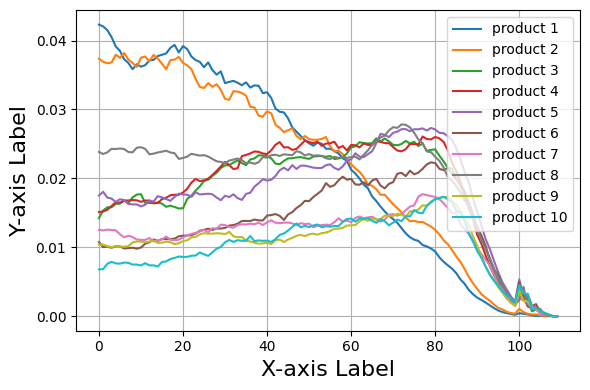

In [259]:
#offer_matrix
array_list = []
for i in range(10):
    file_name = folder+'/OA_seller_offer_matrix'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.mean(array_list, axis=0)[:-1]
array.shape
#purchase_matrix
purchase_array_list = []
for i in range(10):
    file_name = folder+'/OA_seller_purchase_matrix'+str(i)+'.npy'
    purchase_array_list.append(np.load(file_name))
purchase_array = np.mean(purchase_array_list, axis=0)
purchase_array.shape

plt.figure(figsize=(6,4))
x = np.arange(purchase_array.shape[1])
#plt.plot(x, purchase_array[0], color='black',linestyle='dashed',label='no-purchase')
for prod in range(10):
    plt.plot(x, smooth(purchase_array[prod+1]*(array[prod]),10),label='product '+str(prod+1))
    
plt.xlabel('X-axis Label',size=16)
plt.ylabel('Y-axis Label',size=16)
plt.grid(True)  # Optional: add a grid
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### inventory change

In [721]:
array.mean(0).shape

(109, 10)

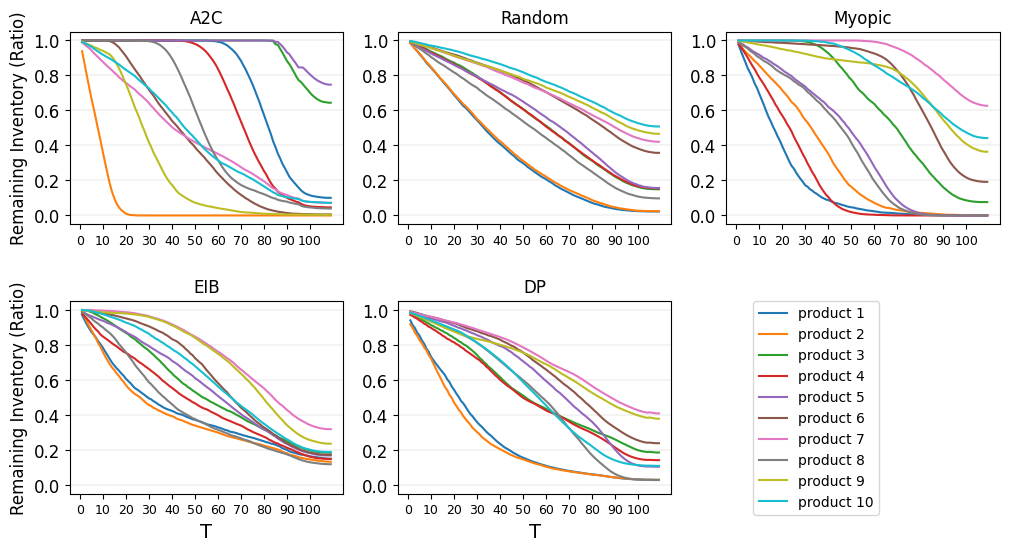

In [691]:
# Create a figure
fig = plt.figure(figsize=(12, 6))

# Create 4 subplots (2 rows, 2 columns)
ax0 = plt.subplot(2, 3, 1)
ax1 = plt.subplot(2, 3, 2)
ax2 = plt.subplot(2, 3, 3)
ax3 = plt.subplot(2, 3, 4)
ax4 = plt.subplot(2, 3, 5)

########################################################################
#change_of_inv_list
array_list = []
for i in range(10):
    file_name = folder+'/change_of_inv_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)/10
array.shape

#fig,ax = plt.subplots(figsize=(6,4))
for prod in range(10):
    array_prod = array[:,:,prod]

    # Optional: Add labels and title
    x = np.arange(array_prod.shape[1])+1  # X values (column indices)
    
    max_values = np.max(array_prod, axis=0)
    min_values = np.min(array_prod, axis=0)
    
    ax0.plot(x, np.mean(array_prod,axis=0),label='product '+str(prod+1))

#ax0.set_xlabel('T',size=14)
ax0.set_xticks(range(0, 101, 10))
ax0.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax0.set_ylabel('Remaining Inventory (Ratio)',size=12)
ax0.grid(True,linewidth=0.2 )  # Optional: add a grid
ax0.xaxis.grid(False)
ax0.legend(fontsize=9,loc='lower left')
ax0.tick_params(axis='x',labelsize=9)
ax0.tick_params(axis='y',labelsize=12)
ax0.set_title('A2C',size=12)

########################################################################
array_list = []
for i in range(10):
    file_name = folder+'/OA_seller_change_of_inv_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)/10
for prod in range(10):
    array_prod = array[:,:,prod]

    # Optional: Add labels and title
    x = np.arange(array_prod.shape[1])+1  # X values (column indices)
    
    max_values = np.max(array_prod, axis=0)
    min_values = np.min(array_prod, axis=0)
    
    ax1.plot(x, np.mean(array_prod,axis=0),label='product '+str(prod+1))
    
    # Fill the area between the max and min lines
    #ax1.fill_between(x, min_values, max_values, alpha=0.2)
#ax1.set_xlabel('T',size=14)
ax1.set_xticks(range(0, 101, 10))
ax1.set_ylim(-0.05,1.05)
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
#ax1.set_ylabel('Remaining Inventory (Ratio)',size=12)
ax1.grid(True,linewidth=0.2 )  # Optional: add a grid
ax1.xaxis.grid(False)
ax1.legend(fontsize=9,loc='lower left')
ax1.tick_params(axis='x',labelsize=9)
ax1.tick_params(axis='y',labelsize=12)
ax1.set_title('Random',size=12)
########################################################################
array_list = []
for i in range(10):
    file_name = folder+'/myopic_seller_change_of_inv_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)/10
for prod in range(10):
    array_prod = array[:,:,prod]

    # Optional: Add labels and title
    x = np.arange(array_prod.shape[1])+1  # X values (column indices)
    
    max_values = np.max(array_prod, axis=0)
    min_values = np.min(array_prod, axis=0)
    
    ax2.plot(x, np.mean(array_prod,axis=0),label='product '+str(prod+1))
    
    # Fill the area between the max and min lines
    #ax2.fill_between(x, min_values, max_values, alpha=0.2)
#ax2.set_xlabel('T',size=14)
ax2.set_xticks(range(0, 101, 10))
ax2.set_ylim(-0.05,1.05)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
#ax2.ylabel('Remaining Inventory (Ratio)',size=16)
ax2.grid(True,linewidth=0.2 )  # Optional: add a grid
ax2.xaxis.grid(False)
ax2.legend(fontsize=9,loc='lower left')
ax2.tick_params(axis='x',labelsize=9)
ax2.tick_params(axis='y',labelsize=12)
ax2.set_title('Myopic',size=12)
########################################################################
array_list = []
for i in range(10):
    file_name = folder+'/E_IB_seller_change_of_inv_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)/10
for prod in range(10):
    array_prod = array[:,:,prod]

    # Optional: Add labels and title
    x = np.arange(array_prod.shape[1])+1  # X values (column indices)
    
    max_values = np.max(array_prod, axis=0)
    min_values = np.min(array_prod, axis=0)
    
    ax3.plot(x, np.mean(array_prod,axis=0),label='product '+str(prod+1))
    
    # Fill the area between the max and min lines
    #ax3.fill_between(x, min_values, max_values, alpha=0.2)
    
ax3.set_xlabel('T',size=14)
ax3.set_xticks(range(0, 101, 10))
ax3.set_ylim(-0.05,1.05)
ax3.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax3.set_ylabel('Remaining Inventory (Ratio)',size=12)
ax3.grid(True,linewidth=0.2 )  # Optional: add a grid
ax3.xaxis.grid(False)
ax3.legend(fontsize=9,loc='lower left')
ax3.tick_params(axis='x',labelsize=9)
ax3.tick_params(axis='y',labelsize=12)
ax3.set_title('EIB',size=12)
########################################################################
array_list = []
for i in range(10):
    file_name = folder+'/DP_Greedy_seller_change_of_inv_list'+str(i)+'.npy'
    array_list.append(np.load(file_name))
array = np.concatenate(array_list, axis=0)/10
for prod in range(10):
    array_prod = array[:,:,prod]

    # Optional: Add labels and title
    x = np.arange(array_prod.shape[1])+1  # X values (column indices)
    
    max_values = np.max(array_prod, axis=0)
    min_values = np.min(array_prod, axis=0)

    #ax4.plot(x, np.append(np.mean(array_prod,axis=0)[:2],smooth(np.mean(array_prod,axis=0)[2:],5)),label='product '+str(prod+1))
    ax4.plot(x, smooth(np.mean(array_prod,axis=0),5),label='product '+str(prod+1))
    
    # Fill the area between the max and min lines
    #ax4.fill_between(x, min_values, max_values, alpha=0.2)
ax4.set_xlabel('T',size=14)
ax4.set_xticks(range(0, 101, 10))
ax4.set_ylim(-0.05,1.05)
ax4.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
#ax4.ylabel('Remaining Inventory (Ratio)',size=16)
ax4.grid(True,linewidth=0.2 )  # Optional: add a grid
ax4.xaxis.grid(False)
ax4.legend(fontsize=9,loc='lower left')
ax4.tick_params(axis='x',labelsize=9)
ax4.tick_params(axis='y',labelsize=12)
ax4.set_title('DP',size=12)
########################################################################
ax0.legend_.remove()
ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend(loc=2, bbox_to_anchor=(1.3,1),borderaxespad = 0.) 
#plt.tight_layout()
plt.subplots_adjust(wspace =0.2, hspace =0.4)
plt.savefig(r'plot/'+'rlN10M4k003I10L100T500mc_inv'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')     
plt.show()